<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Libraries" data-toc-modified-id="Project-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Libraries</a></span></li><li><span><a href="#The-First-Contact-with-Data" data-toc-modified-id="The-First-Contact-with-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The First Contact with Data</a></span><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Overview</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Prep</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Train-and-Test" data-toc-modified-id="Train-and-Test-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train and Test</a></span></li><li><span><a href="#Categorical-Pipeline" data-toc-modified-id="Categorical-Pipeline-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Categorical Pipeline</a></span></li><li><span><a href="#Numerical-Pipeline" data-toc-modified-id="Numerical-Pipeline-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Numerical Pipeline</a></span></li><li><span><a href="#Full-Pipeline" data-toc-modified-id="Full-Pipeline-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Full Pipeline</a></span></li></ul></li><li><span><a href="#Predictive-Model" data-toc-modified-id="Predictive-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predictive Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Voting-Classifier" data-toc-modified-id="Voting-Classifier-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Voting Classifier</a></span></li><li><span><a href="#Bootstrap-Agregating" data-toc-modified-id="Bootstrap-Agregating-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Bootstrap Agregating</a></span></li><li><span><a href="#Adaptative-Boosting" data-toc-modified-id="Adaptative-Boosting-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Adaptative Boosting</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Deep-Neural-Network" data-toc-modified-id="Deep-Neural-Network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Deep Neural Network</a></span><ul class="toc-item"><li><span><a href="#Treinando-Rede-Neural-Profunda" data-toc-modified-id="Treinando-Rede-Neural-Profunda-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Treinando Rede Neural Profunda</a></span></li></ul></li></ul></div>

Hi everyone and welcome to my notebook! I've prepared a helpful (I hope) analysis on the [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), a dataset build from a 2014 study based on marketing campaing of a portuguese bank. By the end, it was possible to flag the data if the customer subsribed or not the produt (`yes` or `no`).

Well, the goal of this notebook is to present you a efficient way to gather insights from data. We will also train a Machine Learning model to predict the chance of a customer to subscribe the bank produto, given the features selected from data. _I really hope you enjoy and if you do so, don't forget to **upvote this kernel**_!

# Project Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
from math import ceil
from datetime import datetime

# Viz libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Utils (constructed at home)
from utils.viz_utils import *
from utils.prep_utils import *
from utils.ml_utils import *
from utils.dnn_utils import *

# Ml libraries
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
import lightgbm as lgb

# Deep Learning frameworks
import tensorflow as tf

# The First Contact with Data

In [2]:
# Reading the data
path = '../data/bank.csv'
df_ori = pd.read_csv(path, sep=',')
df_ori.columns = [col.lower().strip().replace('.', '_') for col in df_ori.columns]

print(f'Data shape: {df_ori.shape}')
df_ori.head()

Data shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


As we could see on the dataset documentation, we have a group of 16 features and one target (this one represented by the column `deposit`). By looking for the data shape, we can see that the data has a little bit more than 11k rows.

At this point, it's important to take a look at each feature's meaning individually. With this we can be prepared to take more confident decisions.

## Data Overview

Here I take freedom to use some homemade implementations built to make some general Data Science steps easier. The next cell calls the `data_overview()` method from my `DataPrep()` class to consolidate some useful insights from the dataset.

In [3]:
# Creating the class object
prep = DataPrep()

# Transforming the dataset target
df = df_ori.copy()
df['target'] = (df['deposit'] == 'yes') * 1
df.drop('deposit', axis=1, inplace=True)

# Returing an overview from the data
target = 'target'
df_overview = prep.data_overview(df, label_name=target)
df_overview

,feature,qtd_null,percent_null,dtype,qtd_cat,target_pearson_corr
0,age,0,0.0,int64,0,0.034901
1,day,0,0.0,int64,0,-0.056326
2,poutcome,0,0.0,object,4,NaN
3,previous,0,0.0,int64,0,0.139867
4,pdays,0,0.0,int64,0,0.151593
5,campaign,0,0.0,int64,0,-0.128081
6,duration,0,0.0,int64,0,0.451919
7,month,0,0.0,object,12,NaN
8,contact,0,0.0,object,3,NaN
9,job,0,0.0,object,12,NaN


By looking at the result above, it's possible to point:

* There is no null data on this dataset;
* The feature `duration` is the one with the highest correlation with our target (there is an observation of this on the dataset's documentation).

# EDA

This is really an important session on the analysis. Here we will apply some data visualization and data exploration techniques in order to gain insights from data. We will propose some questions to be answeared with coding steps.

**Is this a kind of imbalanced dataset?**

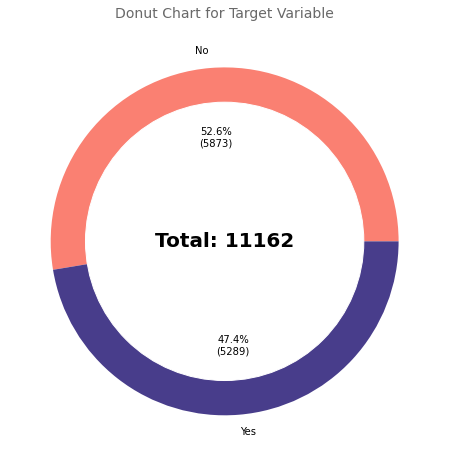

In [6]:
# Ploting a donut chart with the target variable
label_names = ['No', 'Yes']
color_list = ['salmon', 'darkslateblue']

fig, ax = plt.subplots(figsize=(8, 8))
title = 'Donut Chart for Target Variable'
donut_plot(df, target, label_names, ax=ax, text=f'Total: {len(df)}', colors=color_list, title=title)
plt.show()

Well, the graph below shows us that this is not a imbalanced dataset. Both classes has similar proportion.

**What are the categories of the categorical features?**

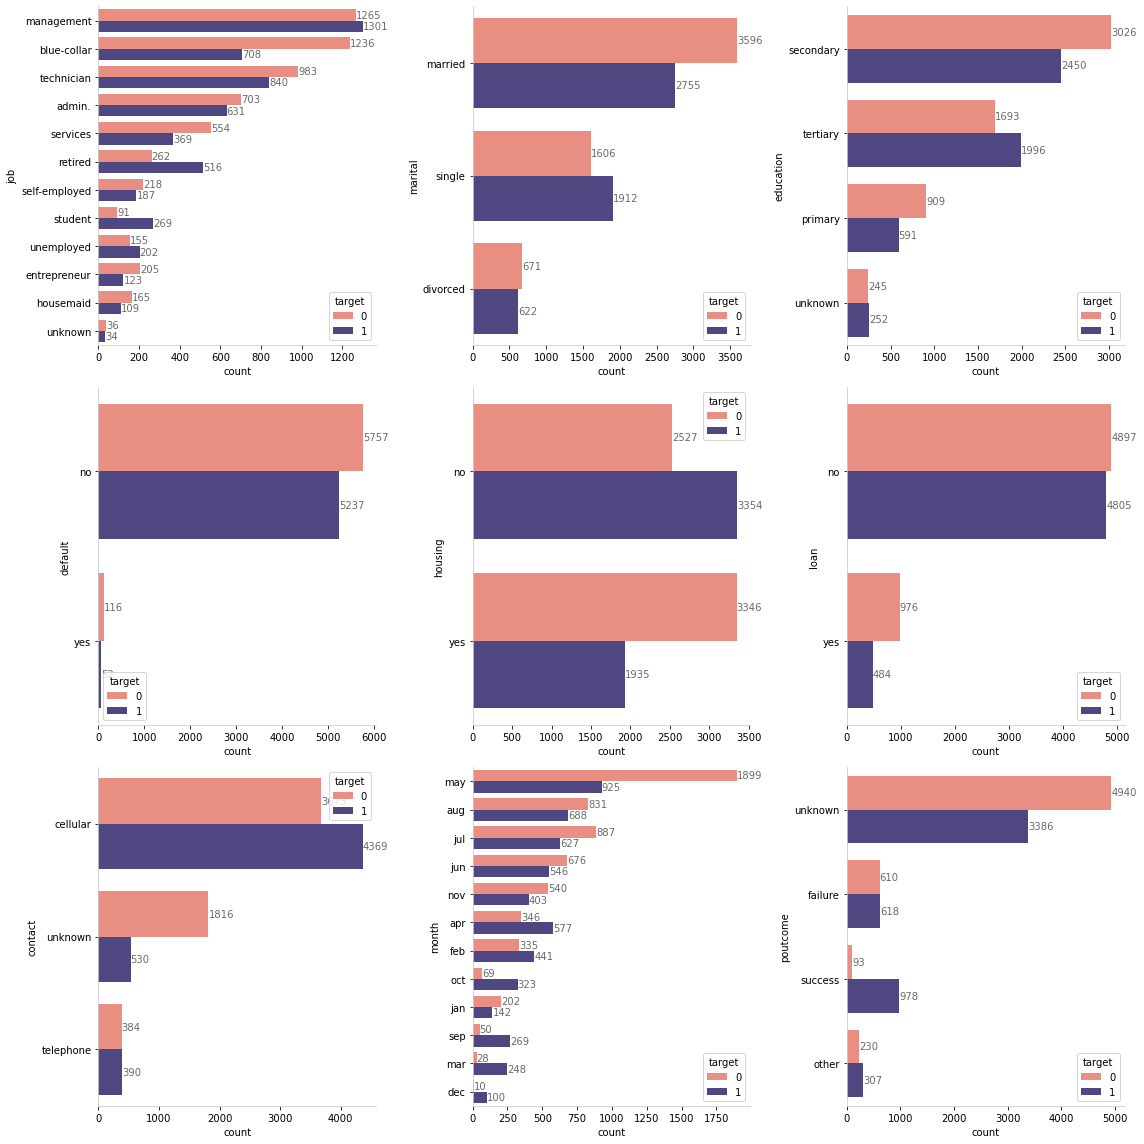

In [7]:
# Visualizing the categorical features
cat_features = [col for col, dtype in df.dtypes.items() if dtype == 'object']
catplot_analysis(df, cat_features, fig_cols=3, hue='target', palette=['salmon', 'darkslateblue'], figsize=(16, 16))

**How is the distribution of numerical features?**

In [9]:
# Parameters
num_features = [col for col, dtype in df.dtypes.items() if dtype != 'object']
num_features.pop(num_features.index('target'))
color_list = ['salmon', 'darkslateblue']

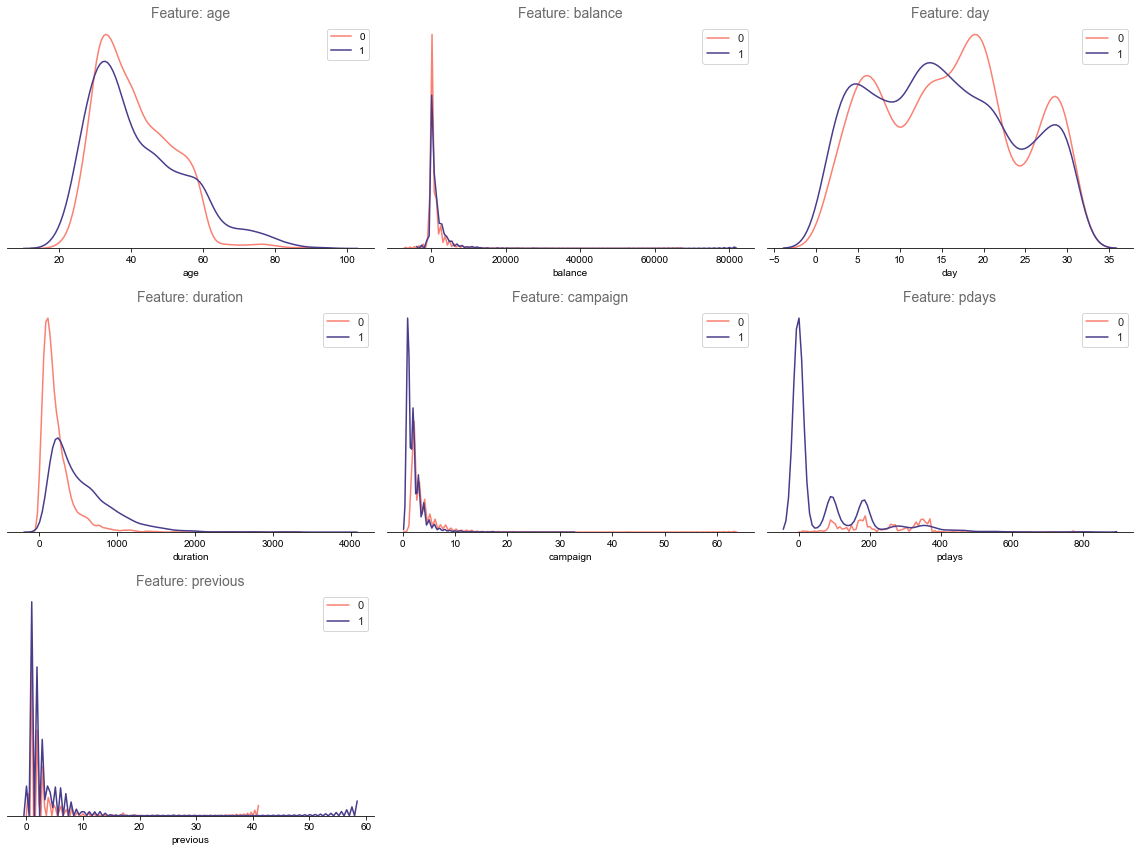

In [10]:
# Analyzing numerical features
distplot(df, num_features, fig_cols=3, hue='target', color=color_list, figsize=(16, 12))

_Searching for different insights from the stripplot_

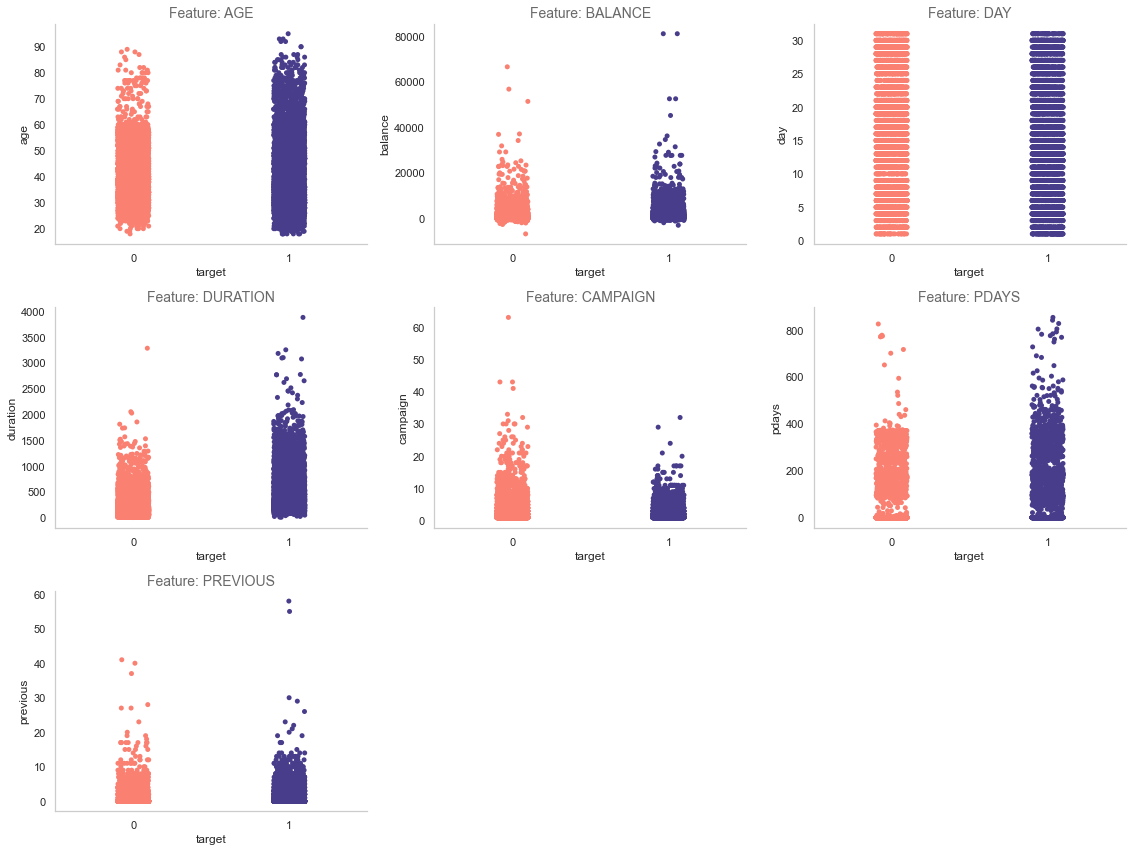

In [11]:
# Stripplot
stripplot(df, num_features, fig_cols=3, hue='target', palette=color_list)

_Searching for different insights from the boxenplot_

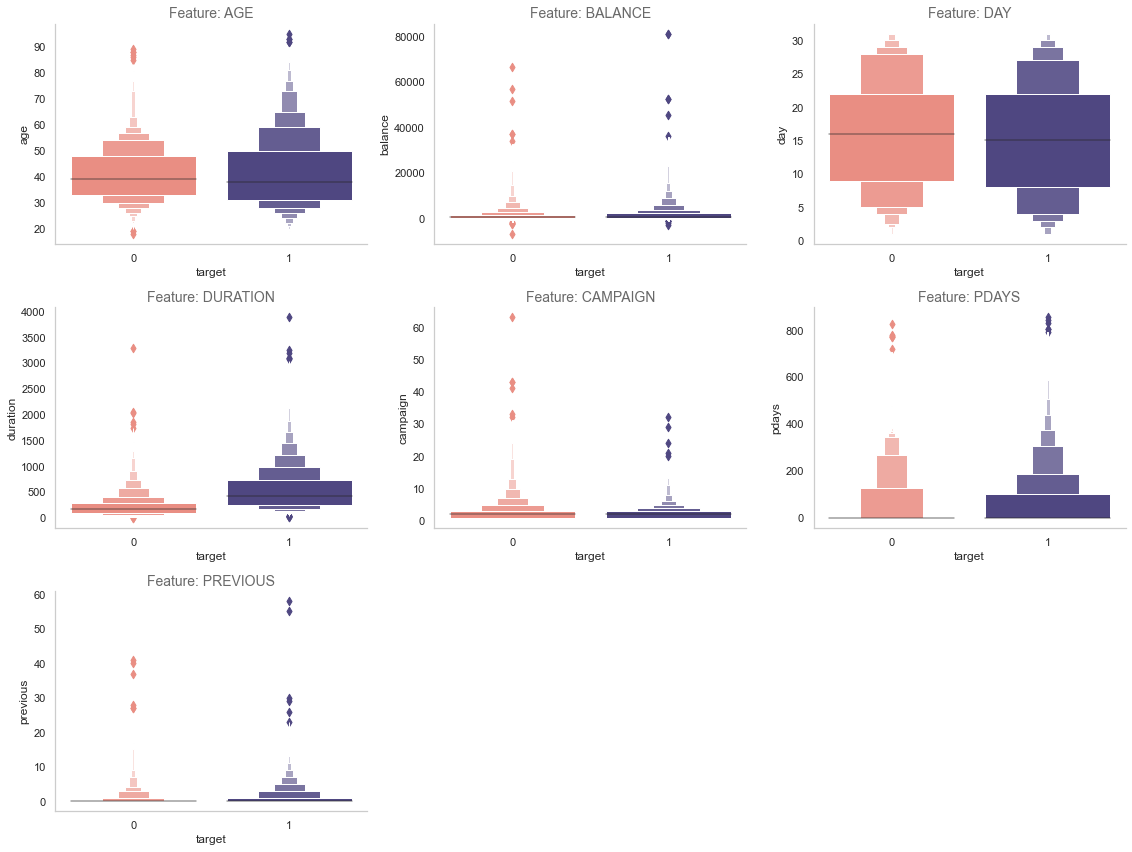

In [12]:
# Stripplot
boxenplot(df, num_features, fig_cols=3, hue='target', palette=color_list)

**What are the features with most positive correlation with the target?**

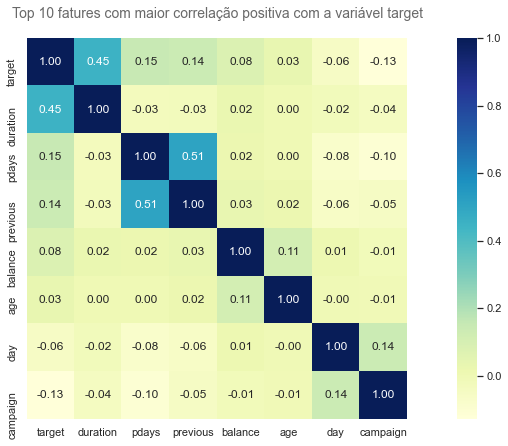

In [13]:
# Analisando top variáveis com maior correlação POSITIVA
top_pos_corr_cols = target_correlation_matrix(df, label_name='target', corr='positive')

# Data Prep

After wenting trough the data exploration step, we can start the preparation step.

## Feature Selection

The first task is related with filtering the columns that won't be used on a preditive model. As long as we don't have any key-columns that don't make sense to put on a Machine Learning algorithm, the only column to be dropped is `duration`. Besides this variable is the most correlated one, this drop must be done because the `duration` here represents the call duration with the customer during the product offer, so its values is known only after the contact is finished.

Thinking of a preditive perspective, we can build a model that is capable to predict the chance of a customer subscripe a product **BEFORE** the contact is made. That's why we must drop `duration`.

In [14]:
# Columns to be dropped
to_drop = ['duration']
df_drop = df.drop(to_drop, axis=1)

# Verifyng
print(f'Shape before the drop: {df.shape}')
print(f'Shape after the drop: {df_drop.shape}')
df_drop.head()

Shape before the drop: (11162, 17)
Shape after the drop: (11162, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1


## Train and Test

A fundamental point on the training Pipeline of Machine Learning models is, with no doubts, the dataset split in training and testing sets. This allows us to optimize the model with one set and validate with another unseen set.

In [15]:
# Splitting the data
X = df_drop.drop('target', axis=1)
y = df_drop['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (8929, 15)
Shape of X_test: (2233, 15)


From this moment, we will put aside the test set and we will work marjoritary with the training set. We go back with test set just to evaluate the model already trained.

Let's make another split: a categorical and a numerical set.

In [16]:
# Returing features by dtype
num_features = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']
cat_features = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']
print(f'Total of numerical features: {len(num_features)}')
print(f'Total of categorical features: {len(cat_features)}')

# Splitting data by dtype
X_train_num = X_train[num_features]
X_train_cat = X_train[cat_features]
print(f'\nShape of numerical training data: {X_train_num.shape}')
print(f'Shape of categorical training data: {X_train_cat.shape}')

Total of numerical features: 6
Total of categorical features: 9

Shape of numerical training data: (8929, 6)
Shape of categorical training data: (8929, 9)


Thinking somehow on building a pre-processing pipeline, let's create a class for doing this splitting by dtype automatically.

In [17]:
# Class for splitting the data by dtype
class SplitDataDtype(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Returing features by dtype
        self.num_features = [col for col, dtype in X.dtypes.items() if dtype != 'object']
        self.cat_features = [col for col, dtype in X.dtypes.items() if dtype == 'object']
        
        # Indexing data
        X_num = X[self.num_features]
        X_cat = X[self.cat_features]
        
        return X_num, X_cat

In [18]:
# Creating object and calling the fit_transform method
dtype_splitter = SplitDataDtype()
X_train_num, X_train_cat = dtype_splitter.fit_transform(X_train)

print(f'Shape of numerical training data: {X_train_num.shape}')
print(f'Shape of categorical training data: {X_train_cat.shape}')

Shape of numerical training data: (8929, 6)
Shape of categorical training data: (8929, 9)


## Categorical Pipeline

After splitting the data on numerical and categorical sets, let's apply the encoding processing on categorical data. This is important for the Machine Learning model to train the data in a correct way.

In [19]:
# Class por encoding the data
class DummiesEncoding(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Collecting variables
        self.cat_features_ori = [col for col, dtype in X.dtypes.items() if dtype == 'object']
        
        # Applying encoding with get_dummies()
        X_cat_dum = pd.get_dummies(X)
        
        # Merging the datasets and eliminating old columns
        X_dum = X.join(X_cat_dum)
        X_dum = X_dum.drop(self.cat_features_ori, axis=1)
        self.features_after_encoding = list(X_dum.columns)
        
        return X_dum

In [20]:
# Applying encoding on categorical data
encoder = DummiesEncoding()
X_train_encoded = encoder.fit_transform(X_train_cat)

print(f'Shape of X_train_encoded: {X_train_encoded.shape}')
X_train_encoded.head()

Shape of X_train_encoded: (8929, 44)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3955,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
11150,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5173,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3017,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2910,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Numerical Pipeline

On the numerical features case, it's possible to apply a scaling proccess. For some model like Logistic Regression, this step is really important in order to give to the algorithm a fast chance to reach the optimal cost. But for another ones, like Decision Trees, the scaling is not a request.

From a didactic perspective, let's apply the scaling on your data.

In [21]:
# Scaling with StandardScaler() class
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)

# Looking at the first line
X_train_scaled[0]

array([-1.11404081,  1.34627101, -0.66666896,  0.92180438,  1.37403675,
        0.99172215])

## Full Pipeline

With all the pipeline steps already defined, let's put everything in a complete Pipeline.

In [22]:
# Initial block code for splitting the data
dtype_spliter = SplitDataDtype()
X_num, X_cat = dtype_spliter.fit_transform(X_train)
num_features = dtype_spliter.num_features
cat_features = dtype_spliter.cat_features

# Numerical pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding())
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Applying the complete pipeline on the training set
X_train_prep = full_pipeline.fit_transform(X_train)

# Returing features
cat_features_encoded = full_pipeline.named_transformers_['cat']['encoder'].features_after_encoding
model_features = num_features + cat_features_encoded

In [23]:
# Result
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_train_prep: {X_train_prep.shape}')
print(f'Total features: {len(model_features)}')
print(f'\nFirst line of X_train_prep: \n\n{X_train_prep[0]}')

Shape of X_train: (8929, 15)
Shape of X_train_prep: (8929, 50)
Total features: 50

First line of X_train_prep: 

[-1.11404081  1.34627101 -0.66666896  0.92180438  1.37403675  0.99172215
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          1.          0.          0.          1.
  0.          1.          0.          1.          0.          1.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          1.          0.
  0.          0.        ]


In [24]:
# Applying the same pipeline for the test set
X_test_prep = full_pipeline.fit_transform(X_test)

print(f'Shape of X_test_prep: {X_test_prep.shape}')

Shape of X_test_prep: (2233, 50)


In [25]:
# Saving everything on a prepared set to feed some homemade classes
set_prep = {
    'X_train_prep': X_train_prep,
    'X_test_prep': X_test_prep,
    'y_train': y_train,
    'y_test': y_test
}

# Predictive Model

After concluding the Data Prep, we can finally start our journey of finding the best Machine Learning model capable to predict the product subscribing chance for a given customer. Let's start with a baseline: Logistic Regression.

## Logistic Regression

In order to make life easier, we will use the `BinaryBaselineClassifier()`, a homemade implementation with some useful methods for training and evaluating Machine Learning models.

In [27]:
# Creating the model and a class object
logreg_clf = LogisticRegression()
logreg_tool = BinaryBaselineClassifier(logreg_clf, set_prep, model_features)

In [28]:
# Defining hyperparmeters
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

# Training the model and optimizing AUC score
logreg_tool.fit(rnd_search=True, param_grid=logreg_param_grid, scoring='roc_auc')

Treinando modelo LogisticRegression com RandomSearchCV.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s


Treinamento finalizado com sucesso! Configurações do modelo: 

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished


**Evaluating Metrics**

In [29]:
# Model performance
logreg_train_performance = logreg_tool.evaluate_performance()
logreg_train_performance

,approach,acc,precision,recall,f1,auc,total_time
LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,2.055


**Confusion Matrix**

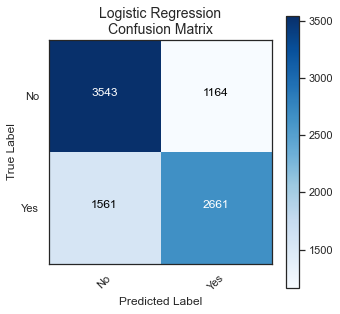

In [30]:
# Plotting confusion matrix
title = 'Logistic Regression\nConfusion Matrix'
classes = ['No', 'Yes']

# Creating figure and calling the method
plt.figure(figsize=(5, 5))
logreg_tool.plot_confusion_matrix(classes, title=title)
plt.show()

**ROC Curve**

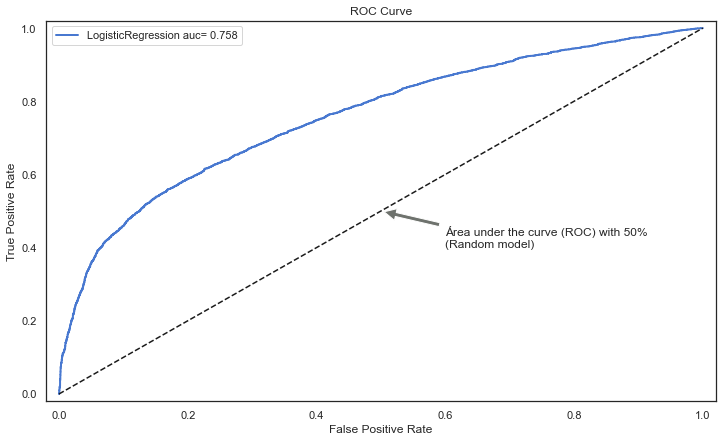

In [31]:
plt.figure(figsize=(12, 7))
logreg_tool.plot_roc_curve()
plt.annotate('Área under the curve (ROC) with 50%\n(Random model)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

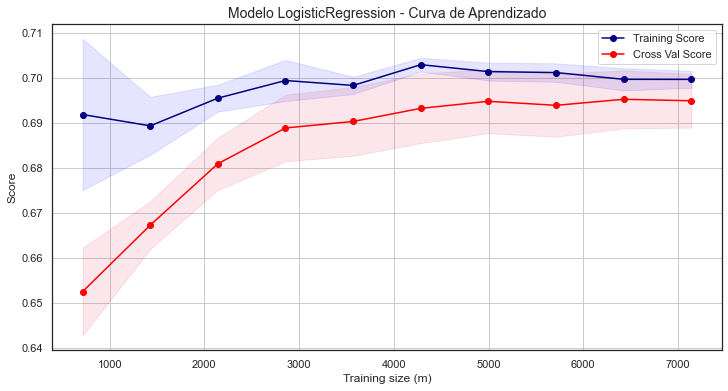

In [32]:
# Plotting the learning curve
logreg_tool.plot_learning_curve()

Looking at the results gotten from Logistic Regression model, it's possible to conclude that this approach allowed a good performance. At least something expected from a baseline model. Meanwhile, it's not wrong to say that the model maybe suffer from a high bias.

For this we can:

    - Collect more features;
    - Collect more data;
    - Train a more complex model 

**Evaluating on the test set**

In [33]:
# Full performance with Logistic Regression
logreg_test_performance = logreg_tool.evaluate_performance(test=True)
logreg_performance = logreg_train_performance.append(logreg_test_performance)
logreg_performance

,approach,acc,precision,recall,f1,auc,total_time
LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,2.055
LogisticRegression,Test Set,0.7210,0.7440,0.6345,0.6849,0.7581,0.252


## Decision Trees

Let's go ahead with our trials. On this second approach, we will use a Decision Trees algorithm.

In [35]:
# Creating objects
tree_model = DecisionTreeClassifier()
tree_tool = BinaryBaselineClassifier(tree_model, set_prep, model_features)

In [36]:
# Defining hyperparameters
tree_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 10, 20],
    'max_features': np.arange(1, X_train_prep.shape[1]),
    'class_weight': ['balanced', None],
    'random_state': [42]
}

tree_tool.fit(rnd_search=True, scoring='roc_auc', param_grid=tree_param_grid)

Treinando modelo DecisionTreeClassifier com RandomSearchCV.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Treinamento finalizado com sucesso! Configurações do modelo: 

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished


**Evaluating metrics**

In [37]:
# Performance
tree_train_performance = tree_tool.evaluate_performance()
tree_train_performance

,approach,acc,precision,recall,f1,auc,total_time
DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.483


**Confusion Matrix**

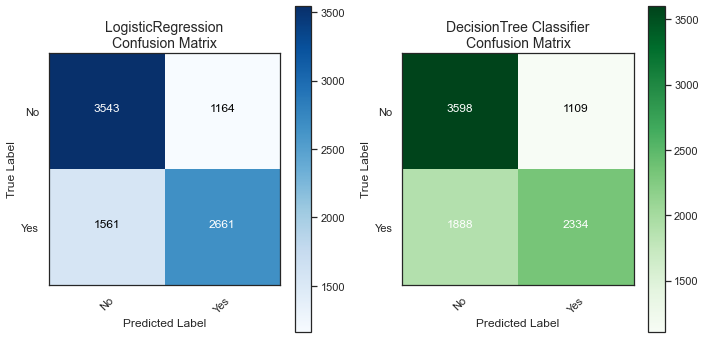

In [38]:
# Variables to plotting
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
classes = ['No', 'Yes']

# Creating figure and calling the method
plt.figure(figsize=(10, 5))

# Logistic Regression
plt.subplot(1, 2, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Decision Trees
plt.subplot(1, 2, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)
plt.tight_layout()
plt.show()

**ROC Curve**

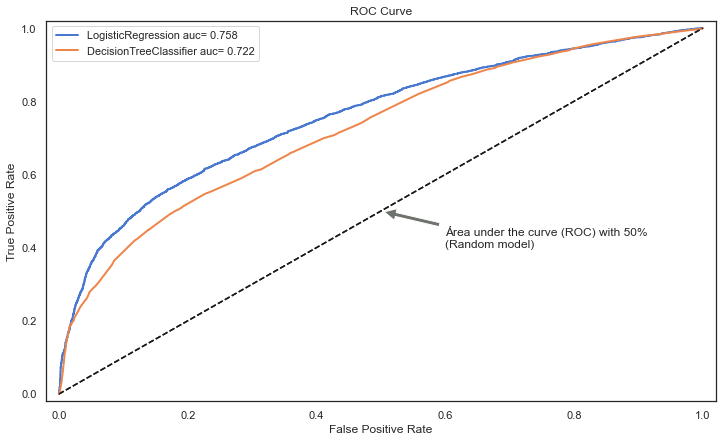

In [39]:
# Creating a figure and calling the method for each estimator
plt.figure(figsize=(12, 7))

logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
plt.annotate('Área under the curve (ROC) with 50%\n(Random model)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

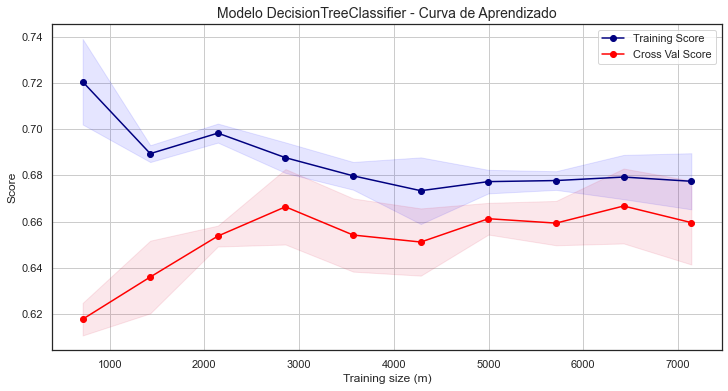

In [40]:
# Plotting the learning curve
tree_tool.plot_learning_curve()

The numbers says that the DecisionTrees model are not so good. By the way it performed worse than our baseline (Logistic Regression). Comparing both metric by metric, the tree model have only a precision higher.

**Feature Importance**

In [41]:
# Evaluating feature importance
feat_imp = tree_tool.feature_importance_analysis()
feat_imp.head(30)

,feature,importance
0,poutcome_unknown,0.302010
1,contact_unknown,0.181082
2,housing_no,0.159393
3,poutcome_failure,0.106933
4,month_apr,0.067558
5,month_oct,0.032343
6,pdays,0.028110
7,month_may,0.015797
8,age,0.014289
9,marital_married,0.013182


**Evaluating on test set**

In [43]:
# Complete performance
tree_test_performance = tree_tool.evaluate_performance(test=True)
tree_performance = tree_train_performance.reset_index().append(tree_test_performance.reset_index())

all_performances = logreg_performance.reset_index().append(tree_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,2.055
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.252
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.483
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.148


## Random Forest

Let's try something more complex: a `RandomForestClassifier`. The basic idea of this model is to use several DecisionTrees models to have a more robust decision.

In [44]:
# Creating objects
forest_model = RandomForestClassifier()
forest_tool = BinaryBaselineClassifier(forest_model, set_prep, model_features)

In [45]:
# Defining hyperparameters
forest_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', None]
}

forest_tool.fit(rnd_search=True, scoring='roc_auc', param_grid=forest_param_grid)

Treinando modelo RandomForestClassifier com RandomSearchCV.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.0s finished


Treinamento finalizado com sucesso! Configurações do modelo: 

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


**Evaluating metrics**

In [46]:
# Model performance
forest_train_performance = forest_tool.evaluate_performance()
forest_train_performance

,approach,acc,precision,recall,f1,auc,total_time
RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,42.222


**Confusion Matrix**

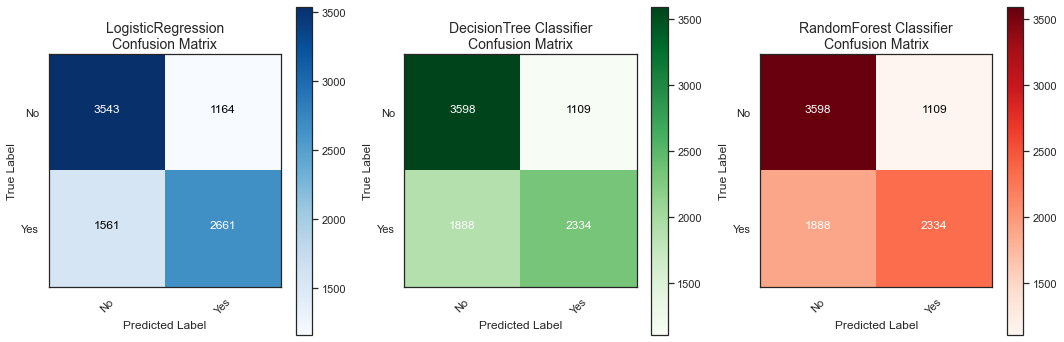

In [47]:
# Variables for plotting
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
classes = ['No', 'Yes']

# Creating figure and calling the method
plt.figure(figsize=(15, 5))

# Logistic Regression
plt.subplot(1, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Decision Trees
plt.subplot(1, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Random Forest
plt.subplot(1, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

plt.tight_layout()
plt.show()

**ROC Curve**

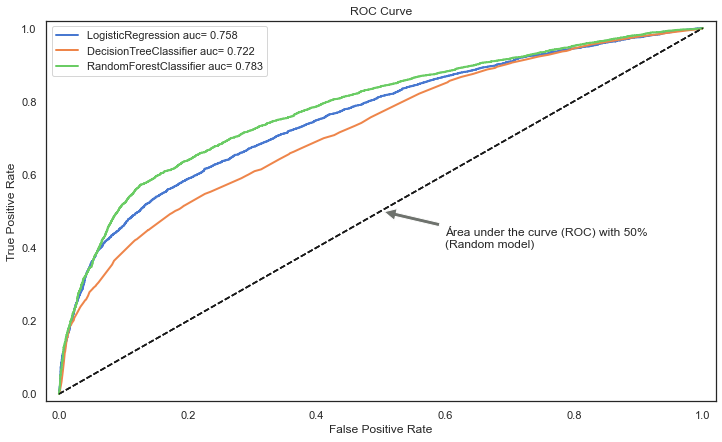

In [48]:
# Creating figure and calling the method for each estimator
plt.figure(figsize=(12, 7))

# ROC Curve for the models
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()

# Annotation
plt.annotate('Área under the curve (ROC) with 50%\n(Random model)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

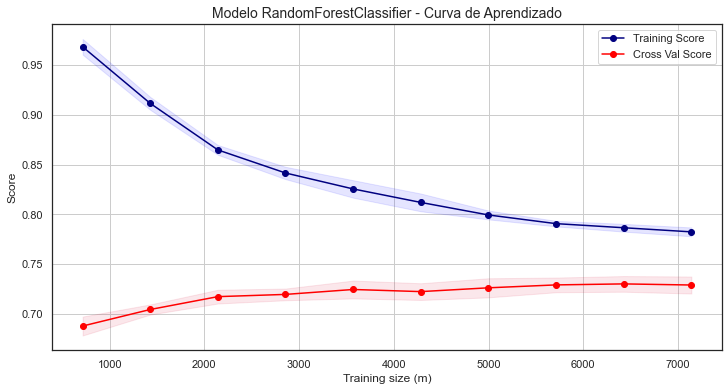

In [49]:
# Plotting the learning curve
forest_tool.plot_learning_curve()

With a better performance than the other models, the Random Forest is certainly a good candidate to be the best model for this task. Meanwhile, looking at the learning curve, it's reasonable to say that this model maybe is suffering for a high variance (common on this type of algorithm). Let's keep moving by now.

**Evaluating on test set**

In [50]:
# Complete performance
forest_test_performance = forest_tool.evaluate_performance(test=True)
forest_performance = forest_train_performance.reset_index().append(forest_test_performance.reset_index())

all_performances = all_performances.append(forest_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

,index,approach,acc,precision,recall,f1,auc,total_time
0,LogisticRegression,Train (CV=5),0.6948,0.6958,0.6303,0.6613,0.7581,2.055
1,LogisticRegression,Test Set,0.721,0.744,0.6345,0.6849,0.7581,0.252
2,DecisionTreeClassifier,Train (CV=5),0.6643,0.6817,0.5528,0.6089,0.7225,0.483
3,DecisionTreeClassifier,Test Set,0.6538,0.6248,0.6898,0.6557,0.7225,0.148
4,RandomForestClassifier,Train (CV=5),0.7284,0.7814,0.591,0.6727,0.7832,42.222
5,RandomForestClassifier,Test Set,0.734,0.7997,0.5914,0.68,0.7832,9.112


## Voting Classifier

Let's apply something known as `Voting Classifier`. This approach represents a group of models making predictions and, after all, the final model consider the prediction of the marjority.

In [51]:
# Creating objects
voting_model = VotingClassifier(
    estimators=[('logreg', logreg_tool.trained_model), ('forest', forest_tool.trained_model)],
    voting='soft'
)

# Treinando modelo
voting_tool = BinaryBaselineClassifier(voting_model, set_prep, model_features)
voting_tool.fit(rnd_search=False)

Treinando modelo VotingClassifier.
Treinamento finalizado com sucesso! Configurações do modelo: 

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight=None

**Métricas do modelo**

In [ ]:
# Verificando performance
voting_train_performance = voting_tool.evaluate_performance()
voting_train_performance

**Matriz de confusão**

In [ ]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 10))

# Regressão Logística
plt.subplot(2, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(2, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(2, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(2, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

plt.tight_layout()
plt.show()

**Curva ROC**

In [ ]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
voting_tool.plot_learning_curve()

Analisando os resultados obtidos através de um classificador baseado na votação entre diversos classificadores, é possível perceber que a performance não teve nenhuma melhora significativa. Muito pelo contrário: para grande parte das métricas, o algoritmo `VotingClassifier` apresentou uma performance inferior aos demais classificadores individuais.

Isso pode ser explicado pelo requisito de sucesso exigido por essa abordagem: um set distinto de classificadores que, de preferência, apresentem erros diversos, fazendo assim com que a votação da maioria seja diversa o suficiente para consolidar um valor plausível de predição. Entretanto, esse classificador foi alimentado apenas com dois algoritmos distintos (Regressão Logística e Random Forest), tirando assim a grande vantagem que essa abordagem poderia trazer.

**Avaliando nos dados de teste**

In [ ]:
# Visualizando a performance completa do modelo de Regressão Logística
voting_test_performance = voting_tool.evaluate_performance(test=True)
voting_performance = voting_train_performance.reset_index().append(voting_test_performance.reset_index())

all_performances = all_performances.append(voting_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

## Bootstrap Agregating

Enquanto o algoritmo `Voting Classifier` traz uma predição baseada nas predições individuais de um set de distindo de classificadores, o modelo `Bootstrap Agregating` tem como principal funcionalidade a utilização de um **mesmo** algoritmo treinado repetidas vezes como preditores.

Uma vez treinados, o conjunto ensemble realiza predições a partir da agregação das predições de todos os preditores individualmente. Normalmente, a predição final é feita a partir da moda de predições dos preditores, ou seja, a predição mais comum obtida pelos algoritmos do conjunto.

In [ ]:
# Instanciando modelo e classe preditiva
bagging_model = BaggingClassifier(
    RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=10, max_features='sqrt', 
                           n_estimators=50, random_state=42), 
    n_estimators=20,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

# Treinando modelo
bagging_tool = BinaryBaselineClassifier(bagging_model, set_prep, model_features)
bagging_tool.fit(rnd_search=False)

**Métricas do modelo**

In [ ]:
# Verificando performance
bagging_train_performance = bagging_tool.evaluate_performance()
bagging_train_performance

**Matriz de confusão**

In [ ]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 10))

# Regressão Logística
plt.subplot(2, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(2, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(2, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(2, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(2, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

plt.tight_layout()
plt.show()

**Curva ROC**

In [ ]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
bagging_tool.plot_learning_curve()

No algoritmo Bootstrap Agregating, foi utilizado o algoritmo Random Forest como preditor (foram utilizados 100 preditores para o modelo final), porém a performance obtida não foi satisfatória do modo esperado. Além dos valores abaixo do preditor individual em relação as métricas, o tempo de processamento para a validação dos resultados foi extremamente elevado, tanto em validação cruzada quanto para os dados de teste.

**Avaliando nos dados de teste**

In [ ]:
# Visualizando a performance completa do modelo de Regressão Logística
bagging_test_performance = bagging_tool.evaluate_performance(test=True)
bagging_performance = bagging_train_performance.reset_index().append(bagging_test_performance.reset_index())

all_performances = all_performances.append(bagging_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

## Adaptative Boosting

Em resumo, o algoritmo `AdaBoost` (Adaptative Boosting) é uma forma de treinar diversos classificadores capazes de corrigir os erros de seus antecessores.

Por exemplo, um primeiro classificador é treinado e utilizado para as predições no próprio set de treinamento. O peso relativo das instâncias classificadas erroneamente são então aprimorados. Um segundo classificador é treinado utilizando os pesos atualizados dessas instâncias e, novamente, utilizado para predições no set de treinamento, gerando novos erros e novas atualizações nos pesos. 

E assim, cada classificador que entrar no pacote irá considerar os pesos atualizados de acordo com os erros cometidos pelos classificadores anteriores.

In [ ]:
# Instanciando modelo e classe preditiva
adaboost_model = AdaBoostClassifier(
    RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=10, max_features='sqrt', 
                           n_estimators=50, random_state=42), 
    n_estimators=20,
    learning_rate=0.5,
    random_state=42
)

# Treinando modelo
adaboost_tool = BinaryBaselineClassifier(adaboost_model, set_prep, model_features)
adaboost_tool.fit(rnd_search=False)

**Métricas do modelo**

In [ ]:
# Verificando performance
adaboost_train_performance = adaboost_tool.evaluate_performance()
adaboost_train_performance

**Matriz de confusão**

In [ ]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
adaboost_title = 'Adaptative Boosting\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 10))

# Regressão Logística
plt.subplot(2, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(2, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(2, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(2, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(2, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

# Adaboost Classifier
plt.subplot(2, 3, 6)
adaboost_tool.plot_confusion_matrix(classes, title=adaboost_title, cmap=plt.cm.Purples)

plt.tight_layout()
plt.show()

**Curva ROC**

In [ ]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()
adaboost_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
adaboost_tool.plot_learning_curve()

Mais uma vez, a performance de um modelo `ensemble` utilizando o algoritmo de DecisionTrees como base não obteve uma performance satisfatória. Analisando a curva de aprendizado do algoritmo `AdaBoost`, é possível perceber um grande viés presente, sendo este representado pelo grande espaçamento entre a métrica obtida apenas nos dados de treino e a métrica obtida utilizando validação cruzada.

**Avaliando nos dados de teste**

In [ ]:
# Visualizando a performance completa do modelo de Regressão Logística
adaboost_test_performance = adaboost_tool.evaluate_performance(test=True)
adaboost_performance = adaboost_train_performance.reset_index().append(adaboost_test_performance.reset_index())

all_performances = all_performances.append(adaboost_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

## Gradient Boosting

Assim como foi visto no algoritmo AdaBoost, o `Gradient Boosting` também trabalha sequencialmente na adição de preditores em um conjunto, cada qual corrigindo o antecessor. Entretanto, ao invés de modificar os pesos de instâncias classificadas erroneamente (como faz o AdaBoost), o Gradient Boosting treina o próximo modelo utilizando os erros residuais do antecessor.

In [ ]:
# Instanciando modelo e classe preditiva
gboost_model = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=1.0,
    max_depth=5, 
    max_features=15,
    random_state=42
)

# Treinando modelo
gboost_tool = BinaryBaselineClassifier(gboost_model, set_prep, model_features)
gboost_tool.fit(rnd_search=False)

**Métricas do modelo**

In [ ]:
# Verificando performance
gboost_train_performance = gboost_tool.evaluate_performance()
gboost_train_performance

**Matriz de confusão**

In [ ]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
adaboost_title = 'Adaptative Boosting\nConfusion Matrix'
gboost_title = 'Gradient Boosting\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 15))

# Regressão Logística
plt.subplot(3, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(3, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(3, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(3, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(3, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

# Adaboost Classifier
plt.subplot(3, 3, 6)
adaboost_tool.plot_confusion_matrix(classes, title=adaboost_title, cmap=plt.cm.Purples)

# Gradient Boosting
plt.subplot(3, 3, 7)
gboost_tool.plot_confusion_matrix(classes, title=gboost_title, cmap=plt.cm.cool)

plt.tight_layout()
plt.show()

**Curva ROC**

In [ ]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()
adaboost_tool.plot_roc_curve()
gboost_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
gboost_tool.plot_learning_curve()

Observando a performance da abordagem por Bootstrap Aggregating, é possível perceber a superioridade em relação ao algoritmo individual de Árvore de Decisão. Entretanto, em termos gerais, essa abordagem não apresentou performance satisfatória em relação aos demais algoritmos treinados.

Isso pode ser explicado pelo fato do algoritmo de Árvore de Decisão ter sido o de menor performance entre todos. Como o conceitod e Bagging envolve as predições de um único preditor, utilizar o modelo de árvore não foi uma boa generalização em busca da melhor performance dentro deste contexto.

Além disso, um ponto considerável a ser citado é o tempo de avaliação do modelo, sendo este o mais demorado entre todos (afinal, está sendo utilizado um set de 500 preditores DecisionTrees!)

**Avaliando nos dados de teste**

In [ ]:
# Visualizando a performance completa do modelo de Regressão Logística
gboost_test_performance = gboost_tool.evaluate_performance(test=True)
gboost_performance = gboost_train_performance.reset_index().append(gboost_test_performance.reset_index())

all_performances = all_performances.append(gboost_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

## LightGBM

In [ ]:
# Criando datasets para o modelo LightGBM
train_data = lgb.Dataset(X_train_prep, label=y_train)
test_data = lgb.Dataset(X_test_prep, label=y_test)

# Parâmetros
lgbm_params = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}
lgbm_model = lgb.LGBMClassifier(**lgbm_params)

In [ ]:
# Instanciando classe para visualizar resultado
lgbm_tool = BinaryBaselineClassifier(lgbm_model, set_prep, model_features)
lgbm_tool.fit(rnd_search=False)

**Métricas do modelo**

In [ ]:
# Verificando performance
lgbm_train_performance = lgbm_tool.evaluate_performance()
lgbm_train_performance

**Matriz de confusão**

In [ ]:
# Definindo parâmetros para plotagem das matrizes
logreg_title = 'LogisticRegression\nConfusion Matrix'
tree_title = 'DecisionTree Classifier\nConfusion Matrix'
forest_title = 'RandomForest Classifier\nConfusion Matrix'
voting_title = 'Voting Classifier\nConfusion Matrix'
bagging_title = 'Bootstrap Aggregating\nConfusion Matrix'
adaboost_title = 'Adaptative Boosting\nConfusion Matrix'
gboost_title = 'Gradient Boosting\nConfusion Matrix'
lgbm_title = 'LightGBM\nConfusion Matrix'
classes = ['No', 'Yes']

# Criando figura e chamando função
plt.figure(figsize=(15, 15))

# Regressão Logística
plt.subplot(3, 3, 1)
logreg_tool.plot_confusion_matrix(classes, title=logreg_title)

# Árvore de Decisão
plt.subplot(3, 3, 2)
tree_tool.plot_confusion_matrix(classes, title=tree_title, cmap=plt.cm.Greens)

# Florestas Aleatórias
plt.subplot(3, 3, 3)
tree_tool.plot_confusion_matrix(classes, title=forest_title, cmap=plt.cm.Reds)

# Voting Classifier
plt.subplot(3, 3, 4)
voting_tool.plot_confusion_matrix(classes, title=voting_title, cmap=plt.cm.Greys)

# Bagging Classifier
plt.subplot(3, 3, 5)
bagging_tool.plot_confusion_matrix(classes, title=bagging_title, cmap=plt.cm.Oranges)

# Adaboost Classifier
plt.subplot(3, 3, 6)
adaboost_tool.plot_confusion_matrix(classes, title=adaboost_title, cmap=plt.cm.Purples)

# Gradient Boosting
plt.subplot(3, 3, 7)
gboost_tool.plot_confusion_matrix(classes, title=gboost_title, cmap=plt.cm.cool)

# Gradient Boosting
plt.subplot(3, 3, 8)
lgbm_tool.plot_confusion_matrix(classes, title=lgbm_title, cmap=plt.cm.winter)

plt.tight_layout()
plt.show()

**Curva ROC**

In [ ]:
# Criando figura e chamando função pra cada estimator
plt.figure(figsize=(12, 7))

# Plotando curva para os modelos
logreg_tool.plot_roc_curve()
tree_tool.plot_roc_curve()
forest_tool.plot_roc_curve()
voting_tool.plot_roc_curve()
bagging_tool.plot_roc_curve()
adaboost_tool.plot_roc_curve()
gboost_tool.plot_roc_curve()
lgbm_tool.plot_roc_curve()

# Anotação
plt.annotate('Área sob a curva (AUC) de 50%\n(Score de um modelo aleatório)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**Learning Curve**

In [ ]:
# Plotando curva de aprendizado do modelo
lgbm_tool.plot_learning_curve()

**Avaliando nos dados de teste**

In [ ]:
# Visualizando a performance completa do modelo de Regressão Logística
lgbm_test_performance = lgbm_tool.evaluate_performance(test=True)
lgbm_performance = lgbm_train_performance.reset_index().append(lgbm_test_performance.reset_index())

all_performances = all_performances.append(lgbm_performance).reset_index(drop=True)
cm = sns.light_palette('cornflowerblue', as_cmap=True)
all_performances.style.background_gradient(cmap=cm)

# Deep Neural Network

Em uma tentativa mais ousada, vamos aplicar alguns conceitos de Redes Neurais Profundas para verificar se a performance de um classificador para este problema de negócio pode ser aprimorado com este tipo de abordagem.

In [ ]:
# Transformando tipos primitivos dos dados para input correto na rede
X_train_prep = X_train_prep.astype('float32')
y_train = y_train.astype('int32')
X_test_prep = X_test_prep.astype('float32')
y_test = y_test.astype('int32')

## Treinando Rede Neural Profunda

In [ ]:
# Testando classe para treinamento de uma Rede Neural Profunda
dnn = DNNTraining()
dnn.fit(X_train_prep, y_train, X_test_prep, y_test)

Exemplo utilizando o Keras:

    # Definindo um modelo utilizando o Keras
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(X_train_prep.shape[1],)),
        keras.layers.Dense(50, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])

    # Compilando modelo
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

    # Realizando treinamento
    model.fit(X_train_prep, y_train, epochs=50, batch_size=256)
    
    # Retornando métricas
    test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test_prep, y_test)
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'auc']
    dnn_metrics = pd.DataFrame(columns=metrics)
    dnn_metrics['loss'] = pd.Series(test_loss)
    dnn_metrics['accuracy'] = pd.Series(test_acc)
    dnn_metrics['precision'] = pd.Series(test_precision)
    dnn_metrics['recall'] = pd.Series(test_recall)
    dnn_metrics['auc'] = pd.Series(test_auc)